In [2]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [3]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}


In [4]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [7]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\golla\AppData\Local\Temp\ipykernel_28396\965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [8]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

Rating                                Title  \
0        4.0          My Review on OnePlus Mobile   
1        4.0  Good phone-could have been better !   
2        4.0               A mildly perfect phone   
3        4.0     This is a branded budget phone 📱   
4        4.0                Going great...for now   
...      ...                                  ...   
4995     5.0                                 Best   
4996     4.0                      Mobile is ohkkk   
4997     4.0                            Nhi ok ok   
4998     4.0                               Good 👍   
4999     3.0                   Not upto one brand   

                                                 Review  \
0     My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...   
1     I've purchased the 6GB version of this phone w...   
2     I will try to keep this review short. This rev...   
3     This is definitely a budget branded phone 📱 af...   
4     I received it today. The quality is good. It's...   
...                                                 ...   
4995                                    Value for money   
4996                                          Thank you   
4997                                        Good camera   
4998  It's a single speaker we want stereo speakers ...   
4999  The media could not be loaded.\n              ...   

                                   Review_Date  
0     Reviewed in India 🇮🇳 on 28 December 2022  
1     Reviewed in India 🇮🇳 on 19 December 2022  
2      Reviewed in India 🇮🇳 on 12 January 2023  
3       Reviewed in India 🇮🇳 on 5 January 2023  
4      Reviewed in India 🇮🇳 on 11 January 2023  
...                                        ...  
4995                            29 August 2022  
4996                             27 April 2022  
4997                             27 April 2022  
4998                             23 March 2022  
4999                              17 July 2022  

[5000 rows x 4 columns]

In [9]:
df.to_csv("Downloads/Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\golla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\golla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\golla\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\golla\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\golla\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\golla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

In [11]:
# load the dataset
reviews=pd.read_csv('Downloads/Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

Rating                                Title  \
0        4.0          My Review on OnePlus Mobile   
1        4.0  Good phone-could have been better !   
2        4.0               A mildly perfect phone   
3        4.0     This is a branded budget phone 📱   
4        4.0                Going great...for now   
...      ...                                  ...   
4995     5.0                                 Best   
4996     4.0                      Mobile is ohkkk   
4997     4.0                            Nhi ok ok   
4998     4.0                               Good 👍   
4999     3.0                   Not upto one brand   

                                                 Review  \
0     My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...   
1     I've purchased the 6GB version of this phone w...   
2     I will try to keep this review short. This rev...   
3     This is definitely a budget branded phone 📱 af...   
4     I received it today. The quality is good. It's...   
...                                                 ...   
4995                                    Value for money   
4996                                          Thank you   
4997                                        Good camera   
4998  It's a single speaker we want stereo speakers ...   
4999  The media could not be loaded.\n              ...   

                                   Review_Date  
0     Reviewed in India 🇮🇳 on 28 December 2022  
1     Reviewed in India 🇮🇳 on 19 December 2022  
2      Reviewed in India 🇮🇳 on 12 January 2023  
3       Reviewed in India 🇮🇳 on 5 January 2023  
4      Reviewed in India 🇮🇳 on 11 January 2023  
...                                        ...  
4995                            29 August 2022  
4996                             27 April 2022  
4997                             27 April 2022  
4998                             23 March 2022  
4999                              17 July 2022  

[5000 rows x 4 columns]

### Data Exploration

In [12]:
reviews.Rating.describe()

count    5000.000000
mean        4.248400
std         0.765255
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [13]:
# Number of Words
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

Review  word_count
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...         432
1  I've purchased the 6GB version of this phone w...         299
2  I will try to keep this review short. This rev...         216
3  This is definitely a budget branded phone 📱 af...         152
4  I received it today. The quality is good. It's...         119

In [14]:
# Number of characters
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

Review  char_count
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...      2530.0
1  I've purchased the 6GB version of this phone w...      1715.0
2  I will try to keep this review short. This rev...      1189.0
3  This is definitely a budget branded phone 📱 af...       807.0
4  I received it today. The quality is good. It's...       692.0

In [15]:
# Average Word Length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

Review  avg_word
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  4.858796
1  I've purchased the 6GB version of this phone w...  4.755034
2  I will try to keep this review short. This rev...  4.509259
3  This is definitely a budget branded phone 📱 af...  4.344371
4  I received it today. The quality is good. It's...  4.823529

In [16]:
# Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

Review  stopwords
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...        178
1  I've purchased the 6GB version of this phone w...        128
2  I will try to keep this review short. This rev...         94
3  This is definitely a budget branded phone 📱 af...         53
4  I received it today. The quality is good. It's...         41

In [17]:
# Number of special characters
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

Review  hashtags
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...         0
1  I've purchased the 6GB version of this phone w...         0
2  I will try to keep this review short. This rev...         0
3  This is definitely a budget branded phone 📱 af...         0
4  I received it today. The quality is good. It's...         0

In [18]:
# Number of numerics
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

Review  numerics
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...         1
1  I've purchased the 6GB version of this phone w...         2
2  I will try to keep this review short. This rev...         0
3  This is definitely a budget branded phone 📱 af...         7
4  I received it today. The quality is good. It's...         0

In [19]:
# Number of Uppercase words
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

Review  upper
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...     20
1  I've purchased the 6GB version of this phone w...      4
2  I will try to keep this review short. This rev...      3
3  This is definitely a budget branded phone 📱 af...      3
4  I received it today. The quality is good. It's...      2

In [20]:
# Spelling correction
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    By POVs for ONE Plus Word CE2 Site Shone.A.Gro...
1    I've purchased the 6GB version of this phone w...
2    I will try to keep this review short. His revi...
3    His is definitely a budget branded phone 📱 aft...
4    I received it today. The quality is good. It's...
Name: Review, dtype: object

#### As you can see spelling mistake did a mistake of correcting the word Hang into Sang in Context to this review the word 'Hang' fits here and not 'Sang'

#### Feature Engineering

In [21]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       Reviewed
1       Reviewed
2       Reviewed
3       Reviewed
4       Reviewed
          ...   
4995          29
4996          27
4997          27
4998          23
4999          17
Name: Review_Date, Length: 5000, dtype: object 
 0           in
1           in
2           in
3           in
4           in
         ...  
4995    August
4996     April
4997     April
4998     March
4999      July
Name: Review_Date, Length: 5000, dtype: object 
 0       India
1       India
2       India
3       India
4       India
        ...  
4995     2022
4996     2022
4997     2022
4998     2022
4999     2022
Name: Review_Date, Length: 5000, dtype: object


In [22]:
# Spliting Review Date into Three seperate Columns (Year,Month,Day)
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

Date   Month   Year
0     Reviewed      in  India
1     Reviewed      in  India
2     Reviewed      in  India
3     Reviewed      in  India
4     Reviewed      in  India
...        ...     ...    ...
4995        29  August   2022
4996        27   April   2022
4997        27   April   2022
4998        23   March   2022
4999        17    July   2022

[5000 rows x 3 columns]

In [23]:
df.Month.value_counts()

in           2370
October       480
September     436
November      363
August        341
July          235
December      185
June          174
May           144
January       123
April          82
March          55
February       12
Name: Month, dtype: int64

In [24]:
# Change 'month' from words to numbers for easier analysis
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

Month
0         in
1         in
2         in
3         in
4         in
...      ...
4995  August
4996       4
4997       4
4998       3
4999    July

[5000 rows x 1 columns]

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       4760 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   word_count   5000 non-null   int64  
 5   char_count   4760 non-null   float64
 6   avg_word     5000 non-null   float64
 7   stopwords    5000 non-null   int64  
 8   hashtags     5000 non-null   int64  
 9   numerics     5000 non-null   int64  
 10  upper        5000 non-null   int64  
 11  Date         5000 non-null   object 
 12  Month        5000 non-null   object 
 13  Year         5000 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 547.0+ KB


In [26]:
# Dropping the Original Columns after splitting the data
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

Rating                                Title  \
0     4.0          My Review on OnePlus Mobile   
1     4.0  Good phone-could have been better !   
2     4.0               A mildly perfect phone   
3     4.0     This is a branded budget phone 📱   
4     4.0                Going great...for now   

                                              Review  word_count  char_count  \
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...         432      2530.0   
1  I've purchased the 6GB version of this phone w...         299      1715.0   
2  I will try to keep this review short. This rev...         216      1189.0   
3  This is definitely a budget branded phone 📱 af...         152       807.0   
4  I received it today. The quality is good. It's...         119       692.0   

   avg_word  stopwords  hashtags  numerics  upper      Date Month   Year  
0  4.858796        178         0         1     20  Reviewed    in  India  
1  4.755034        128         0         2      4  Reviewed    in  India  
2  4.509259         94         0         0      3  Reviewed    in  India  
3  4.344371         53         0         7      3  Reviewed    in  India  
4  4.823529         41         0         0      2  Reviewed    in  India

In [27]:
df

Rating                                Title  \
0        4.0          My Review on OnePlus Mobile   
1        4.0  Good phone-could have been better !   
2        4.0               A mildly perfect phone   
3        4.0     This is a branded budget phone 📱   
4        4.0                Going great...for now   
...      ...                                  ...   
4995     5.0                                 Best   
4996     4.0                      Mobile is ohkkk   
4997     4.0                            Nhi ok ok   
4998     4.0                               Good 👍   
4999     3.0                   Not upto one brand   

                                                 Review  \
0     My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...   
1     I've purchased the 6GB version of this phone w...   
2     I will try to keep this review short. This rev...   
3     This is definitely a budget branded phone 📱 af...   
4     I received it today. The quality is good. It's...   
...                                                 ...   
4995                                    Value for money   
4996                                          Thank you   
4997                                        Good camera   
4998  It's a single speaker we want stereo speakers ...   
4999  The media could not be loaded.\n              ...   

                                   Review_Date  word_count  char_count  \
0     Reviewed in India 🇮🇳 on 28 December 2022         432      2530.0   
1     Reviewed in India 🇮🇳 on 19 December 2022         299      1715.0   
2      Reviewed in India 🇮🇳 on 12 January 2023         216      1189.0   
3       Reviewed in India 🇮🇳 on 5 January 2023         152       807.0   
4      Reviewed in India 🇮🇳 on 11 January 2023         119       692.0   
...                                        ...         ...         ...   
4995                            29 August 2022           3        15.0   
4996                             27 April 2022           2         9.0   
4997                             27 April 2022           2        11.0   
4998                             23 March 2022          13        73.0   
4999                              17 July 2022          31       107.0   

      avg_word  stopwords  hashtags  numerics  upper      Date   Month   Year  
0     4.858796        178         0         1     20  Reviewed      in  India  
1     4.755034        128         0         2      4  Reviewed      in  India  
2     4.509259         94         0         0      3  Reviewed      in  India  
3     4.344371         53         0         7      3  Reviewed      in  India  
4     4.823529         41         0         0      2  Reviewed      in  India  
...        ...        ...       ...       ...    ...       ...     ...    ...  
4995  4.333333          1         0         0      0        29  August   2022  
4996  4.000000          1         0         0      0        27   April   2022  
4997  5.000000          0         0         0      0        27   April   2022  
4998  4.692308          4         0         0      0        23   March   2022  
4999  4.437500          4         0         0      0        17    July   2022  

[5000 rows x 14 columns]

### Data Visualization

In [28]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype(int(float('5.0')))
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

TypeError: Cannot interpret '5' as a data type

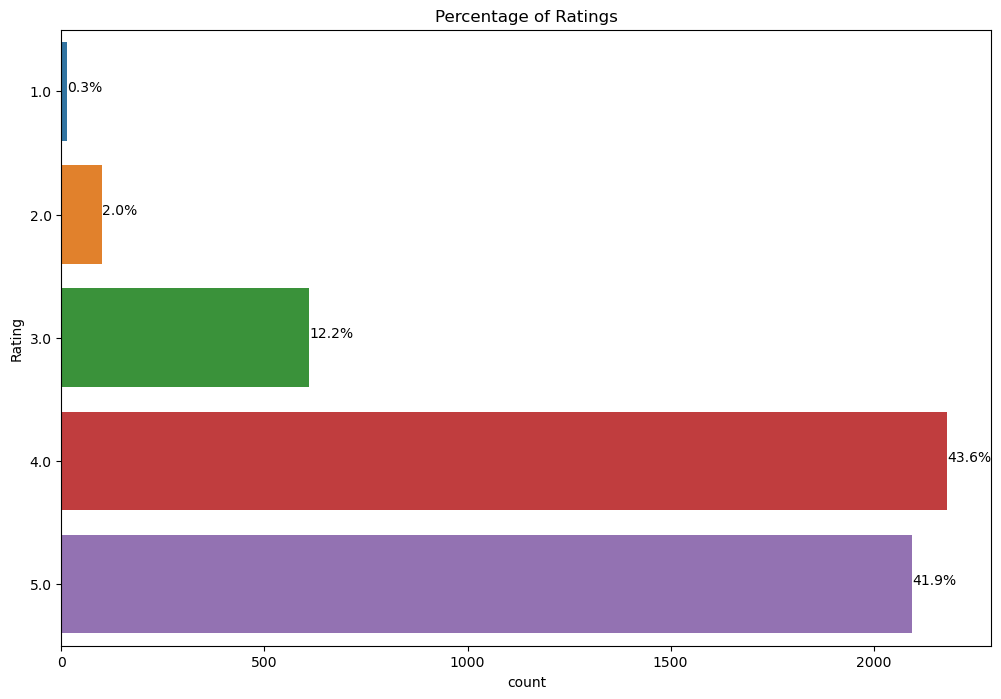

In [29]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### BasicText Preprocessing

In [30]:
# For Sentiment Analysis
data = df[['Review']]
data

Review
0     My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...
1     I've purchased the 6GB version of this phone w...
2     I will try to keep this review short. This rev...
3     This is definitely a budget branded phone 📱 af...
4     I received it today. The quality is good. It's...
...                                                 ...
4995                                    Value for money
4996                                          Thank you
4997                                        Good camera
4998  It's a single speaker we want stereo speakers ...
4999  The media could not be loaded.\n              ...

[5000 rows x 1 columns]

In [32]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [33]:
data

Review
0     povs one plus nord ce2 lite phone.a.pros-----i...
1     i've purchased 6gb version phone comes extenda...
2     try keep review short. review perspective aver...
3     definitely budget branded phone 📱 1 month 22 d...
4     received today. quality good. apt gamers video...
...                                                 ...
4995                                        value money
4996                                              thank
4997                                        good camera
4998  single speaker want stereo speakers bad camera...
4999  media could loaded. don’t buy price less agree...

[5000 rows x 1 columns]

In [34]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [35]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...

### Text Pre-processing Techniques

In [36]:
# Removing '@names'
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [37]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [38]:
# Removing links (http | https)
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [40]:
# Removing Review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [41]:
# Dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [42]:
# Resetting index
# It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [43]:
# Removing Punctuations, Numbers and Special characters
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [44]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [45]:
# Function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [46]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [47]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  \
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...   
1  I've purchased the 6GB version of this phone w...   
2  I will try to keep this review short. This rev...   
3  This is definitely a budget branded phone 📱 af...   
4  I received it today. The quality is good. It's...   
5  Everything is perfect trust me just the front ...   
6  Dual application features is not available, ap...   
7  Overall good phone with average camera quality...   
8  Overall a good 5G phoneBattery- A good battery...   
9                      Very good product under price   

                                    tokenized_tweets  
0  [povs, one, plus, nord, ce, lite, phone, pro, ...  
1  [purchased, gb, version, phone, come, extendab...  
2  [try, keep, review, short, review, perspective...  
3  [definitely, budget, branded, phone, month, da...  
4  [received, today, quality, good, apt, gamers, ...  
5  [everything, perfect, trust, front, camera, li...  
6  [dual, application, feature, available, app, c...  
7  [overall, good, phone, average, camera, qualit...  
8  [overall, good, g, phonebattery, good, battery...  
9                             [good, product, price]

In [48]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [50]:
# Removing Stop words
import codecs
with codecs.open("Downloads/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [51]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [52]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   
5  everything perfect trust front camera little d...   
6  dual application feature available app clone a...   
7  overall good phone average camera quality best...   
8  overall good g phonebattery good battery back ...   
9                                 good product price   

                                   Uncleaned_Reviews  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...  
1  I've purchased the 6GB version of this phone w...  
2  I will try to keep this review short. This rev...  
3  This is definitely a budget branded phone 📱 af...  
4  I received it today. The quality is good. It's...  
5  Everything is perfect trust me just the front ...  
6  Dual application features is not available, ap...  
7  Overall good phone with average camera quality...  
8  Overall a good 5G phoneBattery- A good battery...  
9                      Very good product under price

In [54]:
# Tokenize 'Clean_Reviews'
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['purchased', 'gb', 'version', 'phone', 'come', 'extendable', 'gb', 'ram', 'virtual', 'memory', 'capability', 'good', 'phone', 'least', 'expensive', 'category', 'offering', 'one', 'plus', 'small', 'evident', 'point', 'get', 'noticed', 'first', 'thing', 'confusing', 'placement', 'power', 'button', 'hence', 'finger', 'sensor', 'daily', 'handling', 'mobile', 'phone', 'feel', 'bit', 'annoying', 'finger', 'locking', 'un', 'locking', 'phone', 'try', 'handle', 'place', 'pocket', 'although', 'big', 'problem', 'still', 'something', 'think', 'second', 'point', 'lag', 'noticeable', 'bit', 'hoping', 'might', 'go', 'away', 'update', 'improvement', 'third', 'point', 'speaker', 'volume', 'speaker', 'good', 'near', 'maximum', 'level', 'e', 'volume', 'seem', 'creep', 'steadily', 'rather', 'louds', 'top', 'volume', 'limit', 'fourth', 'point', 'final', 'one', 'camera', 'shoot', 'color', 'realistic', 'photo', 'taken', 'day', 'light', 'especially', 'skin', 'tone', 'tend', 'coloured', 'led', 'flash

In [55]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [povs, one, plus, nord, ce, lite, phone, pro, ...
1    [purchased, gb, version, phone, come, extendab...
2    [try, keep, review, short, review, perspective...
3    [definitely, budget, branded, phone, month, da...
4    [received, today, quality, good, apt, gamers, ...
5    [everything, perfect, trust, front, camera, li...
6    [dual, application, feature, available, app, c...
7    [overall, good, phone, average, camera, qualit...
8    [overall, good, g, phonebattery, good, battery...
9                               [good, product, price]
Name: Clean_Reviews, dtype: object

In [56]:
# Converting words to Stemmer
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [57]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0     pov one plus nord ce lite phone pro use oneplu...
1     purchas gb version phone come extend gb ram vi...
2     tri keep review short review perspect averag u...
3     definit budget brand phone month day use today...
4     receiv today qualiti good apt gamer video watc...
...                                                 ...
4943                                         valu money
4944                                              thank
4945                                        good camera
4946  singl speaker want stereo speaker bad camera q...
4947  medium could load buy price le agre phone extr...

[4948 rows x 1 columns]

In [58]:
# Converting words to Lemma
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\golla\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


stemmed
0     povs one plus nord ce lite phone pro using one...
1     purchased gb version phone come extendable gb ...
2     try keep review short review perspective avera...
3     definitely budget branded phone month day use ...
4     received today quality good apt gamers video w...
...                                                 ...
4943                                        value money
4944                                              thank
4945                                        good camera
4946  single speaker want stereo speaker bad camera ...
4947  medium could loaded buy price le agreed phone ...

[4948 rows x 1 columns]

### Basic Feature Extaction

In [59]:
# Applying bag of Words without N grams
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [60]:
#print(cv.vocabulary_)
print(cv.get_feature_names()[109:200])

['ah', 'ahead', 'aheadof', 'ai', 'aince', 'aint', 'airtel', 'ak', 'aknh', 'al', 'alart', 'albeit', 'alert', 'alexa', 'alignment', 'alike', 'allover', 'allow', 'allram', 'allready', 'allright', 'allround', 'allrounder', 'almost', 'alone', 'along', 'alot', 'already', 'alril', 'also', 'alsothe', 'alspath', 'alternate', 'alternative', 'although', 'altogether', 'always', 'alwayspurchased', 'amaging', 'amaze', 'amazed', 'amazing', 'amazingly', 'amazon', 'amazone', 'amazonit', 'amazoooon', 'ambient', 'amd', 'amezing', 'amezon', 'amh', 'amloiedover', 'ammolated', 'amo', 'amoled', 'amolid', 'among', 'amount', 'ample', 'amzon', 'anazing', 'andar', 'andbcamera', 'andfinger', 'andif', 'andorid', 'android', 'androidbattery', 'angel', 'angle', 'angry', 'animation', 'announce', 'announces', 'annoying', 'another', 'answer', 'answering', 'antutu', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'anywehe', 'anywhere', 'aod', 'ap']


C:\Users\golla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [61]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aaj', 'aap', 'aapko', 'aaplog', 'aati', 'aayega', 'ab', 'abhi', 'able', 'abnd', 'abnormal', 'absence', 'absent', 'absolutely', 'absolutelybut', 'absolutelynot', 'absurd', 'abt', 'acalso', 'accept', 'acceptable', 'acceptablecamera', 'accepted', 'accepts', 'access', 'accessible', 'accessing', 'accessory', 'accha', 'accidental', 'accommodated', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'account', 'accurate', 'acha', 'achcha', 'achchha', 'achchhi', 'achha', 'achhe', 'achhi', 'achi', 'achievable', 'achieve', 'achieved', 'across', 'act', 'activate', 'activated', 'activates', 'activity', 'actual', 'actually', 'ad', 'adamant', 'adapter', 'adaption', 'adaptive', 'adaptor', 'add', 'added', 'addict', 'addicted', 'adding', 'addition', 'additional', 'address', 'adepter', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'admit', 'adopted', 'adopter', 'adoptor', 'advance', 'advanced', 'advantage', 'adventurous', 'advertised', 'advertising', 'advice', 'advise', 'aes

In [62]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
# CountVectorizer with N-grams (Bigrams & Trigrams)
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4948 [00:00<?, ?it/s]

In [64]:
corpus[3]

'definit budget brand phone month day use today post review got phone children day gift father pro heavi user charg stay hour otherwis stay almost day smooth touch issu type anyth camera qualiti awesom show origin skin textur audio qualiti also awesom video qualiti wow g enabl clean uicon filter lover like origin skin textur phone phone p resolut limit g band hdr support netflix amazon prime mean view experi alway lag behind'

In [65]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [66]:
X.shape

(4948, 5000)

In [67]:
cv.get_feature_names()[:20]

['aacha',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'acha hai',
 'achha',
 'achi',
 'achiev',
 'activ',
 'actual',
 'ad']

In [68]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [69]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

aacha  aap  ab  abl  absolut  accept  access  accessori  accha  accord  \
0         0    0   0    0        0       0       0          0      0       0   
1         0    0   0    0        0       0       0          0      0       0   
2         0    0   0    0        0       0       0          0      0       0   
3         0    0   0    0        0       0       0          0      0       0   
4         0    0   0    0        0       0       0          0      0       0   
...     ...  ...  ..  ...      ...     ...     ...        ...    ...     ...   
4943      0    0   0    0        0       0       0          0      0       0   
4944      0    0   0    0        0       0       0          0      0       0   
4945      0    0   0    0        0       0       0          0      0       0   
4946      0    0   0    0        0       0       0          0      0       0   
4947      0    0   0    0        0       0       0          0      0       0   

      ...  year secur  year secur updat  yellow  yesterday  yet  youtub  \
0     ...           0                 0       0          0    0       0   
1     ...           0                 0       0          0    0       0   
2     ...           0                 0       0          0    0       1   
3     ...           0                 0       0          0    0       0   
4     ...           0                 0       0          0    0       0   
...   ...         ...               ...     ...        ...  ...     ...   
4943  ...           0                 0       0          0    0       0   
4944  ...           0                 0       0          0    0       0   
4945  ...           0                 0       0          0    0       0   
4946  ...           0                 0       0          0    0       0   
4947  ...           0                 0       0          0    0       0   

      youtub video  yr  zero  zoom  
0                0   0     0     0  
1                0   0     0     0  
2                0   0     0     0  
3                0   0     0     0  
4                0   0     0     0  
...            ...  ..   ...   ...  
4943             0   0     0     0  
4944             0   0     0     0  
4945             0   0     0     0  
4946             0   0     0     0  
4947             0   0     0     0  

[4948 rows x 5000 columns]

#### TF-IDF Vectorizer

In [70]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4948 [00:00<?, ?it/s]

In [71]:
corpus[4]

'receiv today qualiti good apt gamer video watcher expand gb intern ram make chang basic set becom le technic usag friendli like keypad batteri drain fast charger fast adapt gigant travel would need extra space adjust sim tray extern memori sim option could prove challeng bluetooth sound wireless samsung neck band great sound vibrat take video call lower avoid spoil speaker comfort carri workout phone came transpar cover'

In [72]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [73]:
X.shape

(4948, 5000)

In [74]:
tfidf_v.get_feature_names()[:20]

C:\Users\golla\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aacha',
 'aap',
 'ab',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'accur',
 'acha',
 'acha hai',
 'achha',
 'achi',
 'achiev',
 'activ',
 'actual',
 'ad']

In [75]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [76]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

aacha  aap   ab  abl  absolut  accept  access  accessori  accha  accord  \
0       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
1       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
2       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
3       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4       0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
...     ...  ...  ...  ...      ...     ...     ...        ...    ...     ...   
4943    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4944    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4945    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4946    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   
4947    0.0  0.0  0.0  0.0      0.0     0.0     0.0        0.0    0.0     0.0   

      ...  year secur  year secur updat  yellow  yesterday  yet    youtub  \
0     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
1     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
2     ...         0.0               0.0     0.0        0.0  0.0  0.075692   
3     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4     ...         0.0               0.0     0.0        0.0  0.0  0.000000   
...   ...         ...               ...     ...        ...  ...       ...   
4943  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4944  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4945  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4946  ...         0.0               0.0     0.0        0.0  0.0  0.000000   
4947  ...         0.0               0.0     0.0        0.0  0.0  0.000000   

      youtub video   yr  zero  zoom  
0              0.0  0.0   0.0   0.0  
1              0.0  0.0   0.0   0.0  
2              0.0  0.0   0.0   0.0  
3              0.0  0.0   0.0   0.0  
4              0.0  0.0   0.0   0.0  
...            ...  ...   ...   ...  
4943           0.0  0.0   0.0   0.0  
4944           0.0  0.0   0.0   0.0  
4945           0.0  0.0   0.0   0.0  
4946           0.0  0.0   0.0   0.0  
4947           0.0  0.0   0.0   0.0  

[4948 rows x 5000 columns]

### Named Entity Recognition (NER)

In [77]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'povs one plus nord ce lite phone pro using oneplus last month review one plus phone positive better atleast another phone like realme redmi vivo oppo poco new model brand camera mp rare camera total mp macro lens good flash light potrait mode camera productive real good clarity good camera quality feel especially day light really click good photo videography also clear good rate camera audio good quality audio streao speaker even though sound produce intense good give also good oxygen touch gesture also smooth premium sure doesnot generate heat fast even though continuously play game atleast hour experienced till micro processor chipboard built good quality snapdragon processor upto gb ram extension fecility anyone gb gb good combination though go gb ram also ram extended upto gb mean gb gb extension manually done setting many user friendly function like battery symbol widget changed couple type unique classy compared android phone overall powerful phone good battery backup b con head

In [78]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

C:\Users\golla\anaconda3\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [79]:
for token in doc_block[:50]:
    print(token,token.pos_)  

povs NOUN
one NUM
plus CCONJ
nord PROPN
ce PROPN
lite PROPN
phone NOUN
pro NOUN
using VERB
oneplus NOUN
last ADJ
month NOUN
review NOUN
one NUM
plus CCONJ
phone NOUN
positive ADJ
better ADV
atleast VERB
another DET
phone NOUN
like SCONJ
realme PROPN
redmi VERB
vivo NOUN
oppo ADJ
poco ADP
new ADJ
model NOUN
brand NOUN
camera NOUN
mp NOUN
rare ADJ
camera NOUN
total ADJ
mp NOUN
macro NOUN
lens NOUN
good ADJ
flash PROPN
light PROPN
potrait PROPN
mode PROPN
camera NOUN
productive ADJ
real ADJ
good ADJ
clarity NOUN
good ADJ
camera NOUN


In [80]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['lock', 'button', 'call', 'call', 'merged', 'disconnect', 'call', 'time', 'consuming', 'fella', 'prefer', 'oneplus', 'camera', 'range', 'go', 'oneplus', 'feel', 'check', 'photo', 'uploaded', 'taken', 'oneplus', 'phone', 'hope', 'photo', 'taken', 'phone', 'camera', 'review', 'given', 'lot', 'tech', 'term', 'wanted', 'make', 'review', 'understanding', 'hope', 'review', 'follow', 'facebook', 'pronoy', 'purchased', 'version', 'phone', 'come', 'ram', 'memory', 'capability', 'phone', 'category', 'offering', 'point', 'noticed', 'thing', 'confusing', 'placement', 'power', 'button', 'finger', 'sensor', 'handling', 'phone', 'feel', 'bit', 'finger', 'locking', 'locking', 'phone', 'try', 'handle', 'place', 'pocket', 'problem', 'think', 'point', 'lag', 'bit', 'hoping', 'go', 'update', 'improvement', 'point', 'speaker', 'volume', 'speaker', 'level', 'e', 'volume', 'seem', 'louds', 'volume', 'limit', 'point', 'camera', 'shoot', 'color', 'photo', 'taken', 'day']


In [81]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0        phone   2140
1       camera   1508
2      battery   1018
3      quality    889
4      product    484
5        price    474
6         life    346
7          day    318
8  performance    318
9     charging    312

<AxesSubplot: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

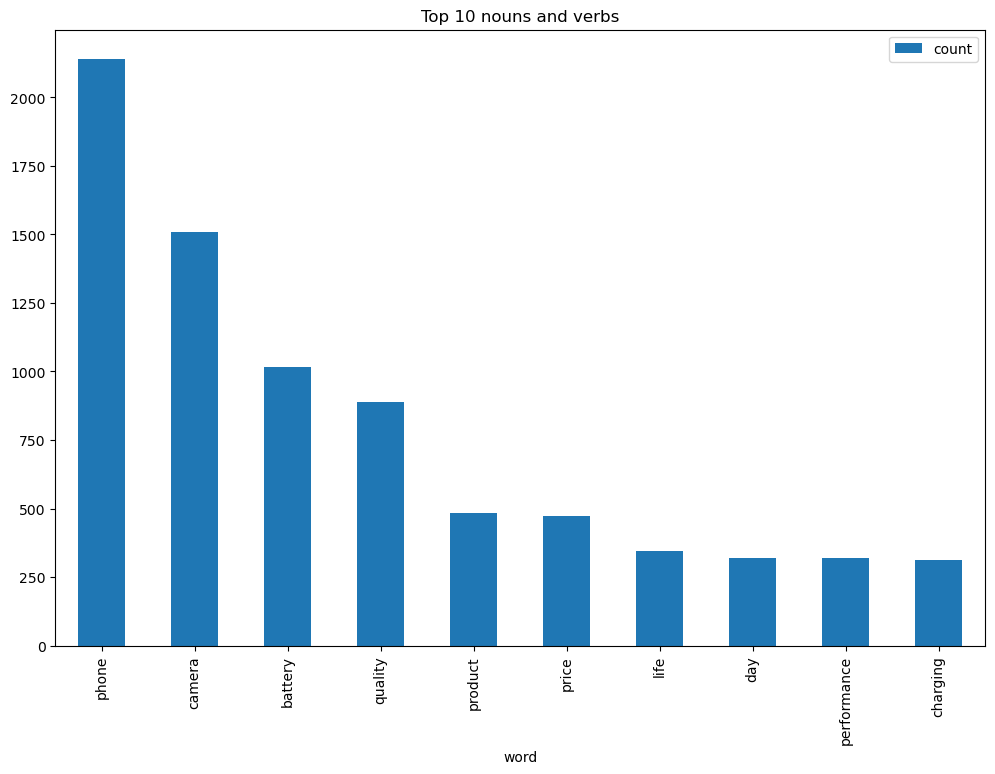

In [82]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

### Feature Extraction

In [83]:
# Feature Extraction for 'Key Words'
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

#### Fetch sentiments
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways:
a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)
b. Using TextBlob

In [84]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [85]:
#  Using NLTK's SentimentIntensityAnalyzer
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

Clean_Reviews
pos           4580
neg            368

In [86]:
dataframe.Clean_Reviews[8]

'overall good g phonebattery good battery back last upto half day normal use camera good want excellent camera phone personally expected brand otherwise everything like processor speed performance etc good'

In [87]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'compound': 0.9524}

In [89]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

Review  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   

                                              scores  
0  {'neg': 0.018, 'neu': 0.69, 'pos': 0.291, 'com...  
1  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...  
2  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...  
3  {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...  
4  {'neg': 0.054, 'neu': 0.732, 'pos': 0.215, 'co...

In [90]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

Review  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   

                                              scores  compound  
0  {'neg': 0.018, 'neu': 0.69, 'pos': 0.291, 'com...    0.9974  
1  {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  
2  {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  
3  {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...    0.9839  
4  {'neg': 0.054, 'neu': 0.732, 'pos': 0.215, 'co...    0.9217

In [91]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

Review  \
0     povs one plus nord ce lite phone pro using one...   
1     purchased gb version phone come extendable gb ...   
2     try keep review short review perspective avera...   
3     definitely budget branded phone month day use ...   
4     received today quality good apt gamers video w...   
...                                                 ...   
4943                                        value money   
4944                                              thank   
4945                                        good camera   
4946  single speaker want stereo speaker bad camera ...   
4947  medium could loaded buy price le agreed phone ...   

                                                 scores  compound sentiment  
0     {'neg': 0.018, 'neu': 0.69, 'pos': 0.291, 'com...    0.9974  Positive  
1     {'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...    0.9876  Positive  
2     {'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...    0.9776  Positive  
3     {'neg': 0.045, 'neu': 0.584, 'pos': 0.371, 'co...    0.9839  Positive  
4     {'neg': 0.054, 'neu': 0.732, 'pos': 0.215, 'co...    0.9217  Positive  
...                                                 ...       ...       ...  
4943  {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...    0.3400  Positive  
4944  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.3612  Positive  
4945  {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...    0.4404  Positive  
4946  {'neg': 0.324, 'neu': 0.556, 'pos': 0.12, 'com...   -0.4939  Negative  
4947  {'neg': 0.251, 'neu': 0.593, 'pos': 0.156, 'co...   -0.3167  Negative  

[4948 rows x 4 columns]

In [92]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

C:\Users\golla\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<AxesSubplot: xlabel='sentiment', ylabel='count'>

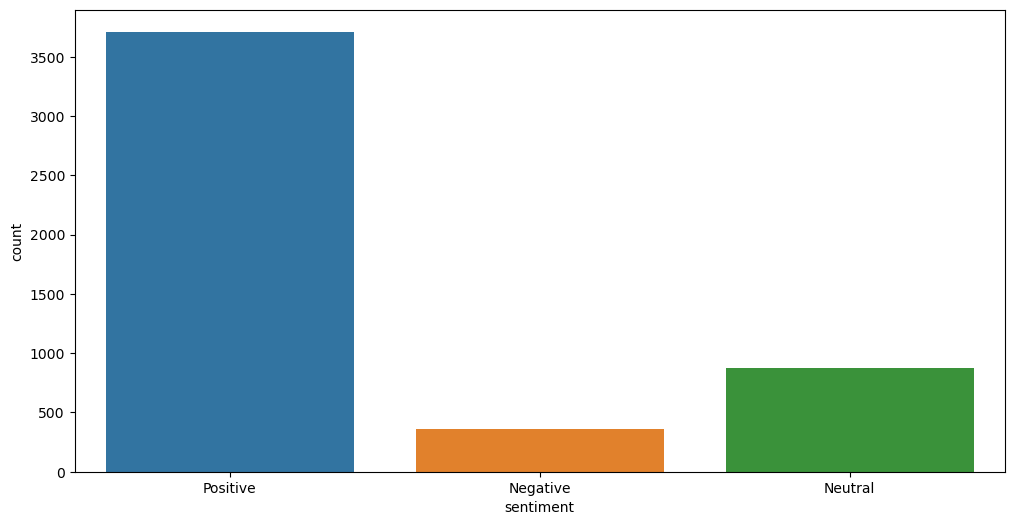

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\Users\golla\AppData\Local\Temp\ipykernel_28396\3383353206.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='compound', ylabel='Density'>

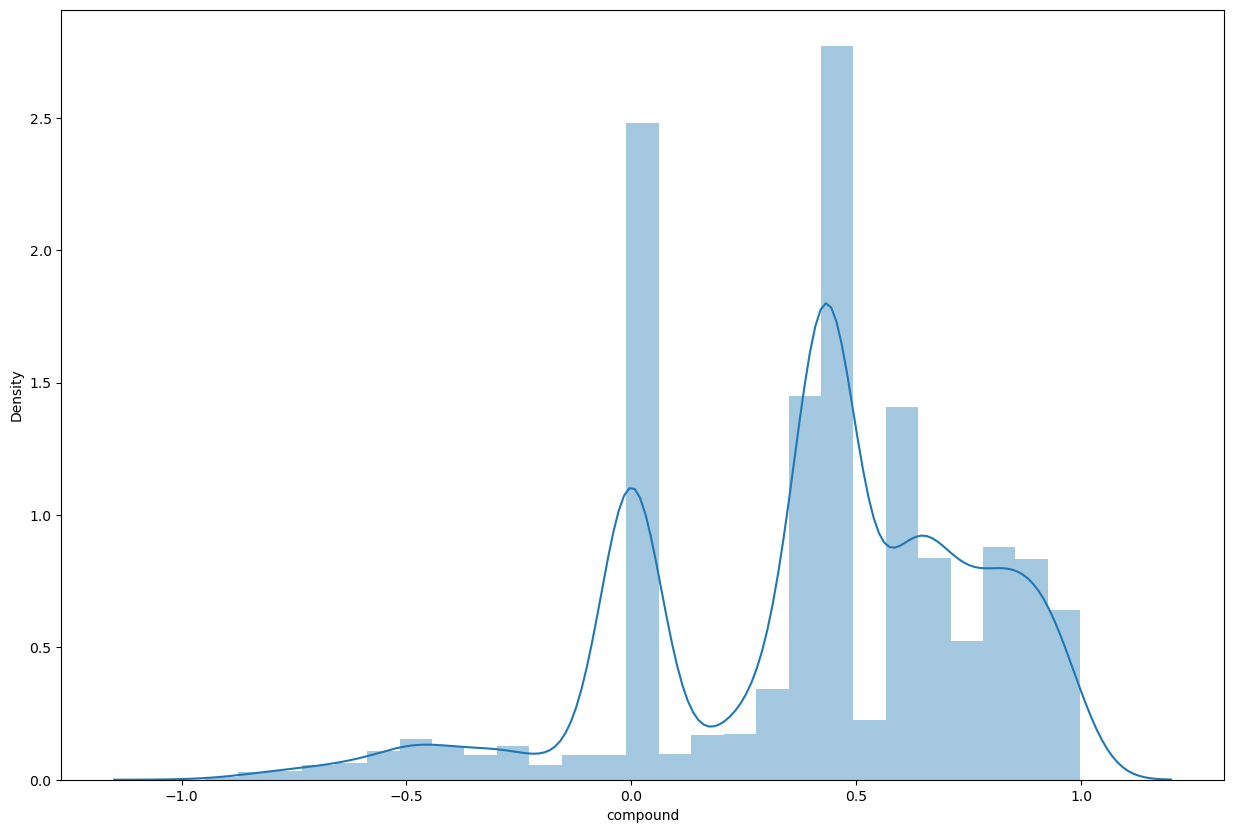

In [95]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [96]:
df['word_count'] = df['Tweets'].apply(lambda x: len(str(x).split(" ")))
df[['Tweets','word_count']].head()

KeyError: 'Tweets'

AttributeError: 'DataFrame' object has no attribute 'Polarity'

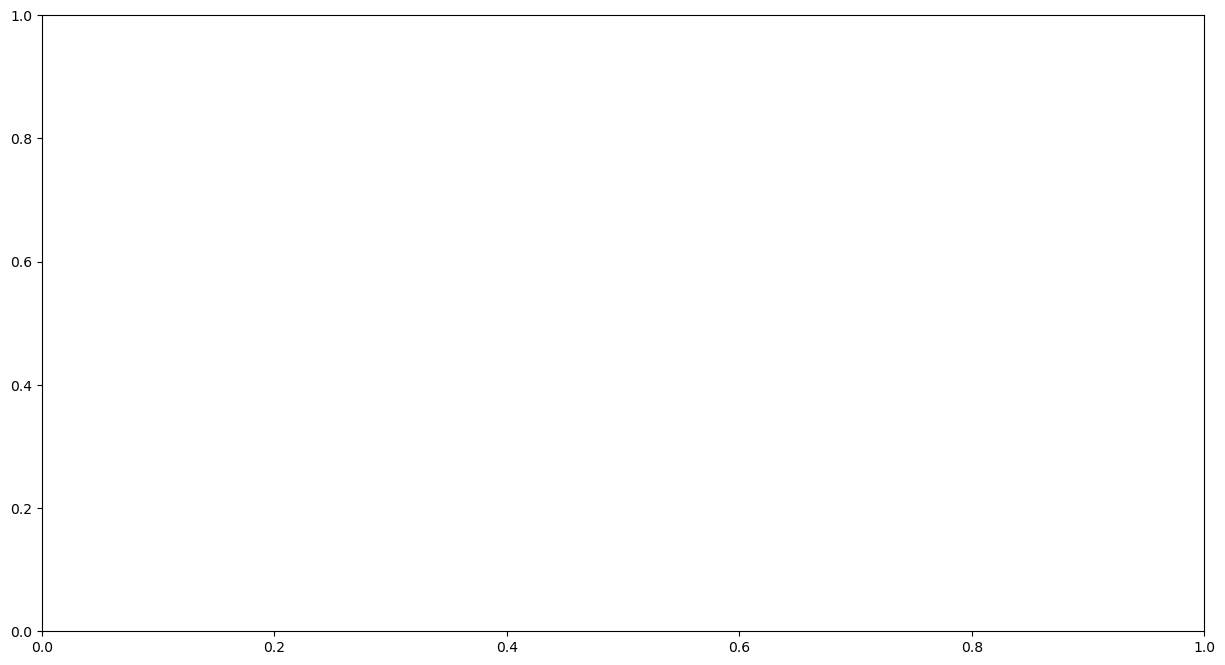

In [97]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [98]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

Clean_Reviews
pos           4641
neg            307

In [99]:
# let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...      0.587476  0.325023  
1  I've purchased the 6GB version of this phone w...      0.486111  0.180556  
2  I will try to keep this review short. This rev...      0.498519  0.169769  
3  This is definitely a budget branded phone 📱 af...      0.685863  0.219395  
4  I received it today. The quality is good. It's...      0.471667  0.305000

Text(0, 0.5, 'Subjectivity')

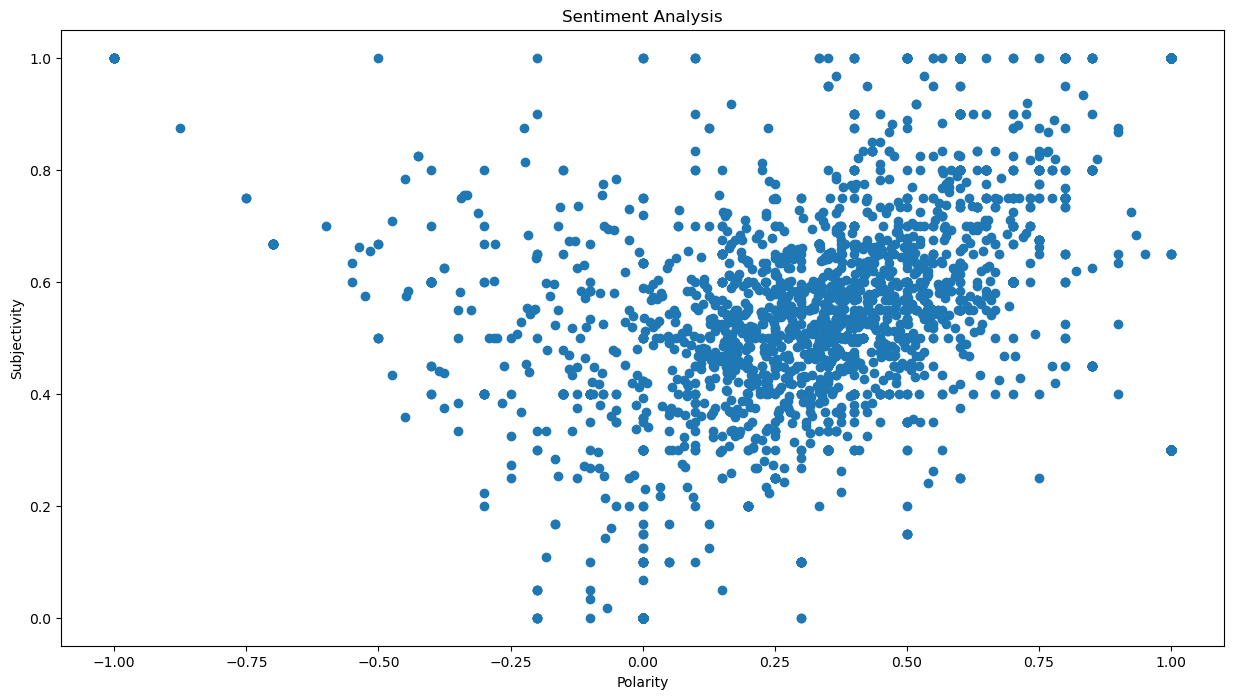

In [100]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [101]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

##### NLTK gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

In [102]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("Downloads/clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0  povs one plus nord ce lite phone pro using one...   
1  purchased gb version phone come extendable gb ...   
2  try keep review short review perspective avera...   
3  definitely budget branded phone month day use ...   
4  received today quality good apt gamers video w...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  \
0  My POVs for ONE Plus Nord CE2 Lite Phone.A.Pro...      0.587476  0.325023   
1  I've purchased the 6GB version of this phone w...      0.486111  0.180556   
2  I will try to keep this review short. This rev...      0.498519  0.169769   
3  This is definitely a budget branded phone 📱 af...      0.685863  0.219395   
4  I received it today. The quality is good. It's...      0.471667  0.305000   

  sentiment  
0       pos  
1       pos  
2       pos  
3       pos  
4       pos

### Story Generation and Visualization

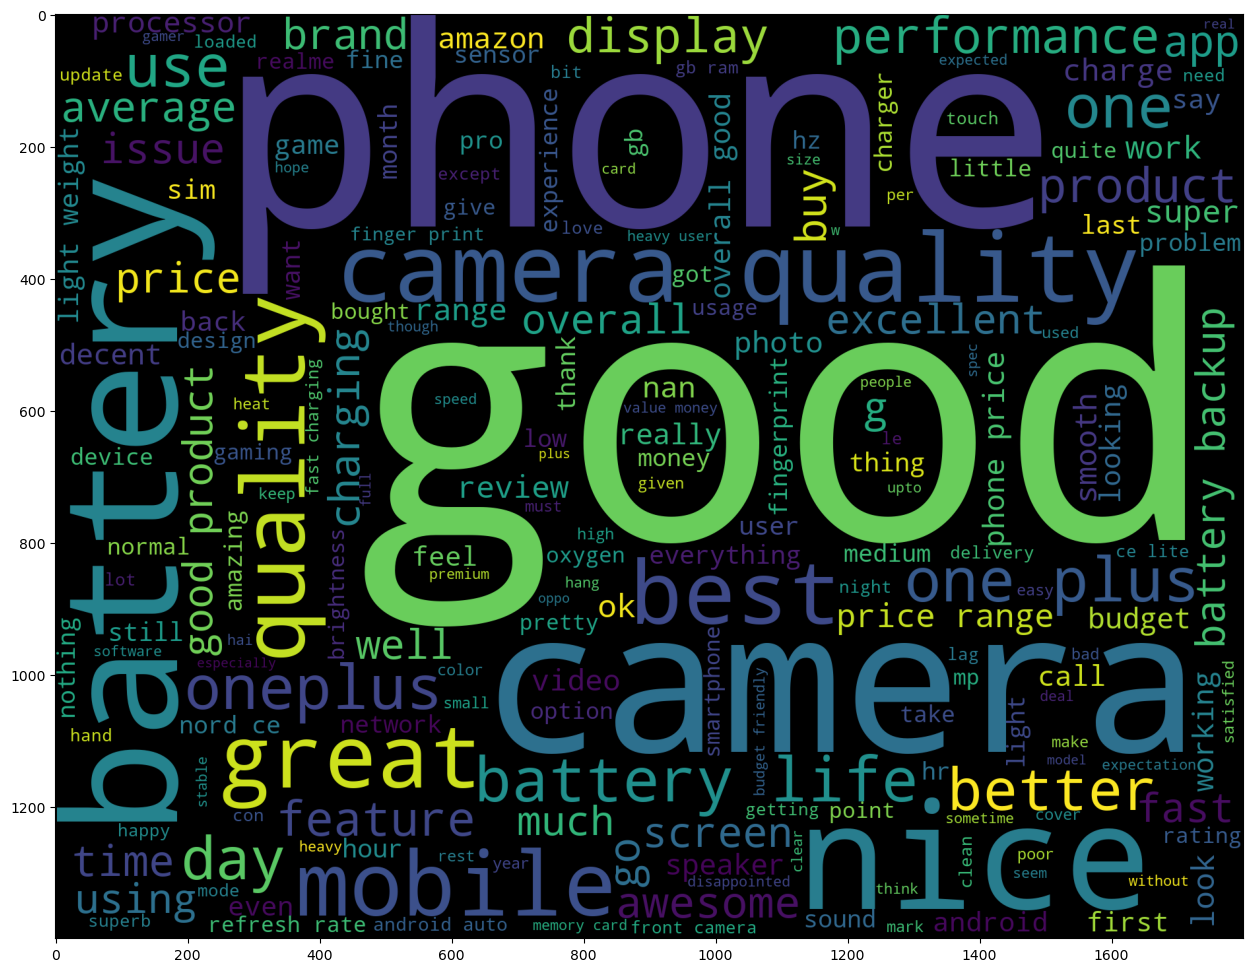

In [103]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [104]:
# Most common words in positive Review
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

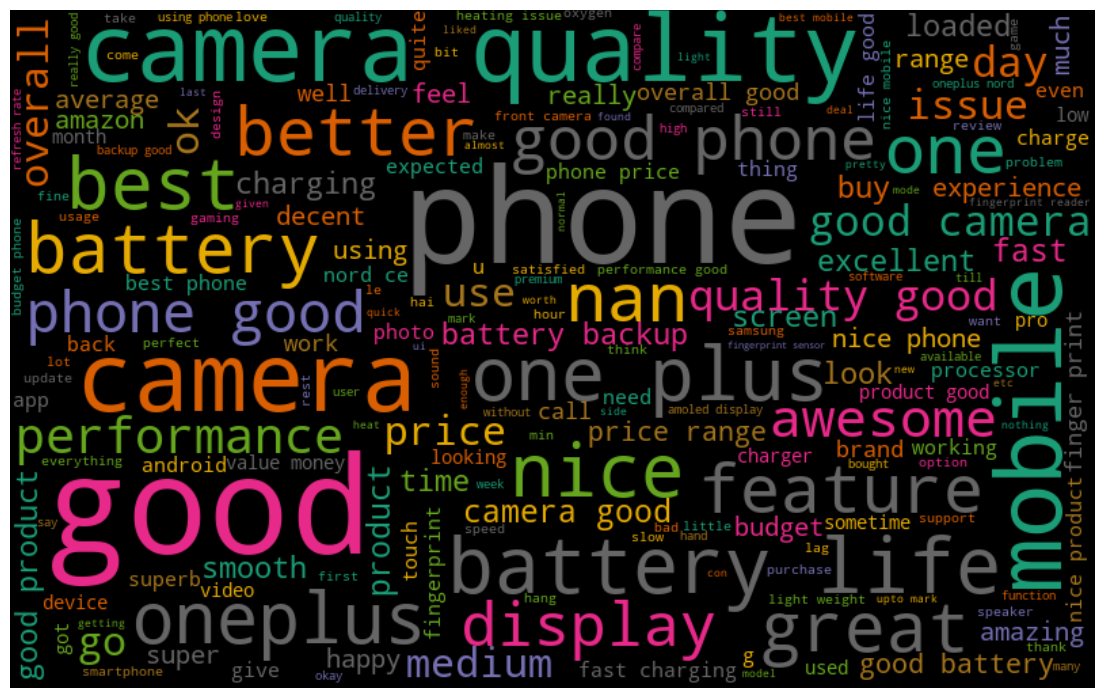

In [105]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

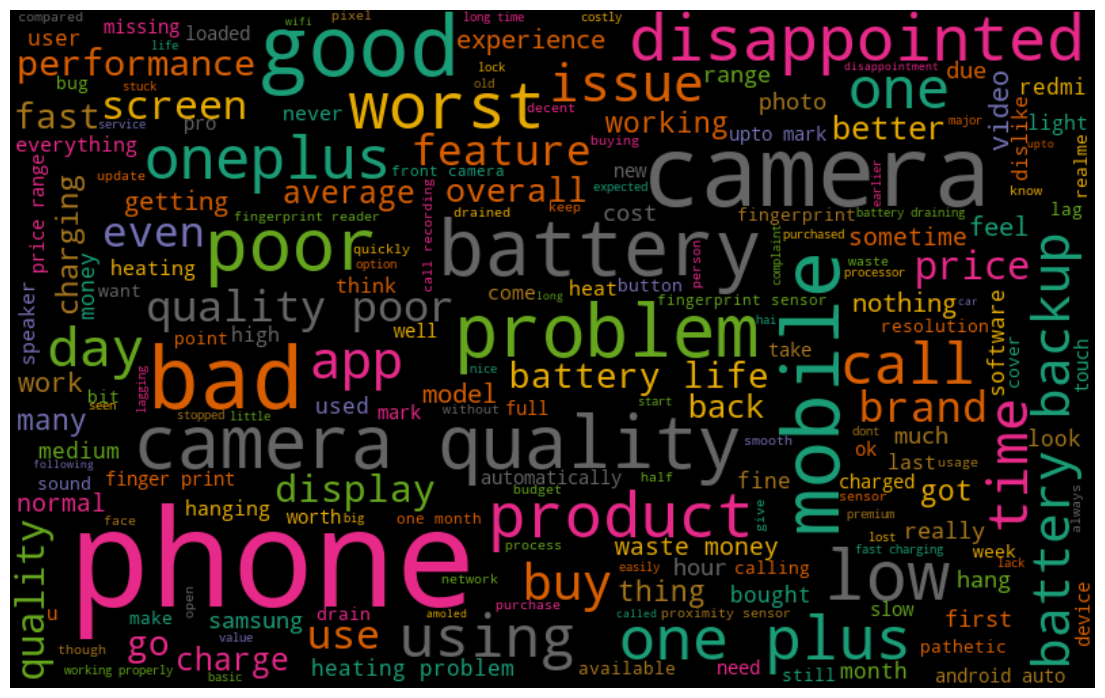

In [106]:
# Most common words in negative Review
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)